In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
import seaborn as sns

sns.set_context("talk")

plt.style.use("../plots.mplstyle")

In [3]:
data_ltrm = np.loadtxt("ltrm/relax.dat")
data_trm = np.loadtxt("trm_2012/relax.dat")

In [4]:
df1 = pd.DataFrame({"trm": data_ltrm[:, 4],}, index=data_ltrm[:, 0])

df2 = pd.DataFrame({"trm\_2012": data_trm[:, 4],}, index=data_trm[:, 0])

df = df2.join(df1)
df.head()

,trm\_2012,trm
1.0,1509.340,1509.34000
2.0,754.339,832.61100
3.0,189.607,165.93300
4.0,144.810,36.20780
5.0,202.008,2.13568


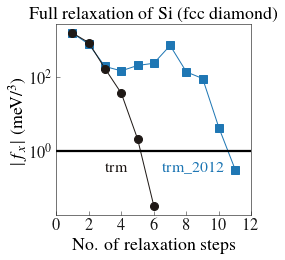

In [5]:
fig, ax = plt.subplots(figsize=(3.5, 3.5))

kw = {"ls": "-", "ms": 8, "lw": 1, "label": "_nolegend_", "legend": False}

c1 = "#1f1916"
c2 = "C0"

df2.plot(ax=ax, marker="s", c=c2, **kw)
df1.plot(ax=ax, marker="o", c=c1, **kw)

ax.set_yscale("log")
ax.axhline(1, c="k")
ax.set_xlim([0, 12])
ax.set_xlabel("No. of relaxation steps")
ax.set_ylabel(r"$|f_x|$ (meV/$\AA^3$)", rotation=90)
# .yaxis.labelpad = 40

ax.set_xticks(np.arange(0, 13, 2))
ax.set_title("Full relaxation of Si (fcc diamond)")

y = 0.3
fs = 16
ax.text(3, y, "trm", c=c1, fontsize=fs)
ax.text(6.5, y, "trm\_2012", c=c2, fontsize=fs)

fig.savefig("ltrm.pdf", bbox_inches="tight")